In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

In [2]:
df = pandas.read_csv('meteorite_landings.csv')

In [3]:
df.describe()

id      mass (g)        reclat       reclong
count  45716.000000  4.558500e+04  38401.000000  38401.000000
mean   26889.735104  1.327808e+04    -39.122580     61.074319
std    16860.683030  5.749889e+05     46.378511     80.647298
min        1.000000  0.000000e+00    -87.366670   -165.433330
25%    12688.750000  7.200000e+00    -76.714240      0.000000
50%    24261.500000  3.260000e+01    -71.500000     35.666670
75%    40656.750000  2.026000e+02      0.000000    157.166670
max    57458.000000  6.000000e+07     81.166670    354.473330

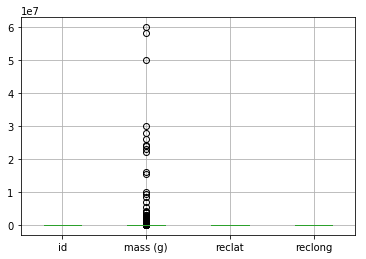

In [41]:
df.boxplot()

In [4]:
df.head()

name   id nametype     recclass  mass (g)  fall  \
0    Aachen    1    Valid           L5      21.0  Fell   
1    Aarhus    2    Valid           H6     720.0  Fell   
2      Abee    6    Valid          EH4  107000.0  Fell   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell   
4   Achiras  370    Valid           L6     780.0  Fell   

                     year    reclat    reclong               GeoLocation  
0  01/01/1880 12:00:00 AM  50.77500    6.08333     (50.775000, 6.083330)  
1  01/01/1951 12:00:00 AM  56.18333   10.23333    (56.183330, 10.233330)  
2  01/01/1952 12:00:00 AM  54.21667 -113.00000  (54.216670, -113.000000)  
3  01/01/1976 12:00:00 AM  16.88333  -99.90000   (16.883330, -99.900000)  
4  01/01/1902 12:00:00 AM -33.16667  -64.95000  (-33.166670, -64.950000)

In [5]:
from mpl_toolkits.basemap import Basemap

In [6]:
location_df = df[['GeoLocation']]
location_df = location_df['GeoLocation'].str.strip('()')
location_df = location_df.apply(lambda x: pandas.Series(str(x).split(',')))

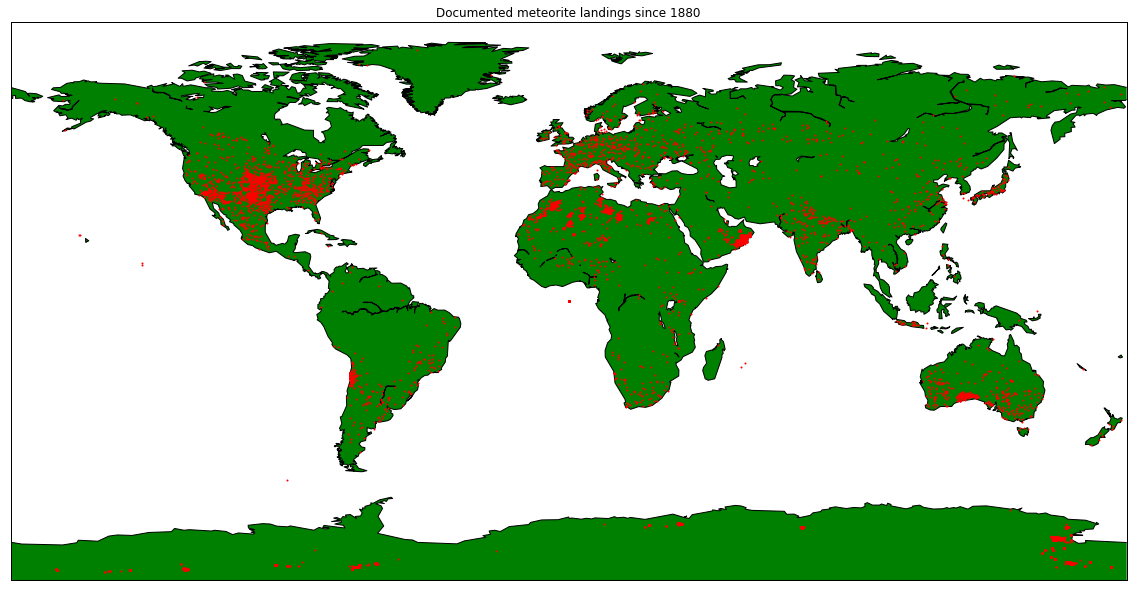

In [7]:
plt.figure(figsize=(20,12))
map = Basemap()
map.drawmapboundary(fill_color='white')
map.fillcontinents(color='green',lake_color='white')
map.drawcoastlines()
plt.title('Documented meteorite landings since 1880')
for i in range(0, len(location_df)):
    lon = location_df[1][i]
    #print(lon)
    lat = location_df[0][i]
    #print(lat)
    x,y = map(lon,lat)
    map.plot(x, y,'ro', markersize=1)
    pass
#plt.show()

In [13]:
df_weights = df['mass (g)'].dropna().to_frame()

In [14]:
df_weights = df_weights/1000
df_weights.columns = ['mass (kg)']
df_weights['mass (kg)'].value_counts()

0.001300      171
0.001200      140
0.001400      138
0.002100      130
0.002400      126
0.001600      120
0.000500      119
0.001100      116
0.003800      114
0.000700      111
0.001500      111
0.003100      109
0.001700      109
0.003200      109
0.000900      108
0.000600      108
0.003000      108
0.000800      107
0.001800      104
0.002500      103
0.002700      102
0.003600       96
0.002000       96
0.001000       96
0.004200       95
0.002800       93
0.002900       93
0.002200       92
0.002600       91
0.003300       88
             ... 
0.083290        1
99.300000       1
0.052550        1
0.349100        1
0.136400        1
0.998000        1
7.745000        1
0.029650        1
0.070320        1
0.140710        1
0.374700        1
0.030040        1
108.500000      1
0.092310        1
0.201500        1
0.503950        1
0.069280        1
0.033870        1
0.185800        1
0.015950        1
0.123600        1
0.018365        1
920.000000      1
0.160320        1
0.011822  

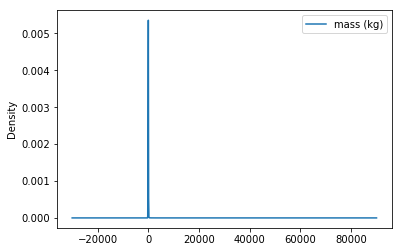

In [10]:
df_weights.plot(kind="density")

In [18]:
largest = df['mass (g)'].argmax()
df.ix[largest]

name                              Hoba
id                               11890
nametype                         Valid
recclass                     Iron, IVB
mass (g)                         6e+07
fall                             Found
year            01/01/1920 12:00:00 AM
reclat                        -19.5833
reclong                        17.9167
GeoLocation    (-19.583330, 17.916670)
Name: 16383, dtype: object

In [ ]:
print(df_weights.std())
print(df_weights.mean())
print(df_weights.var())

In [40]:
df_weights.quantile(0.5)
#df['mass (g)'].quantile(0)

mass (kg)    0.0326
Name: 0.5, dtype: float64